##  Advertising budgets for TV, radio, and newspaper media.

### Using Linear regression

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [157]:
df = pd.read_csv('Advertising.csv')

In [158]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### **Is there a relationship between *total* advertising spend and *sales*?**

In [159]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

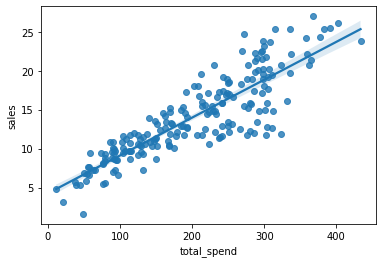

In [160]:
sns.regplot(df['total_spend'], df['sales'])
plt.show()

In [161]:
df['total_spend'].corr(df['sales'])

0.8677123027017419

In [162]:
X = df['total_spend']
y = df['sales']

In [163]:
# Checking Simple linear regrssion using Polyfit
# y = mx+b
# y = B1x+b0

np.polyfit(X,y, deg=1) # B0, b1 values

array([0.04868788, 4.24302822])

In [164]:
# unknown feature need to predict

potential_spend = np.linspace(0,500,100)

In [165]:
predicted_sale = 0.04868788*potential_spend +4.24302822

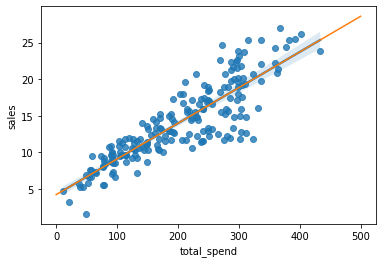

In [166]:
sns.regplot(df['total_spend'], df['sales'])
plt.plot(potential_spend,predicted_sale)

### **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

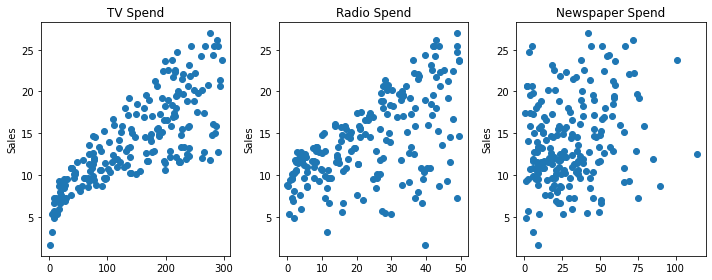

In [167]:
# Relationships between features

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,4))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [168]:
df= df.drop('total_spend', axis=1) # To drop total spend column

In [169]:
X = df.drop('sales', axis=1)
y = df['sales']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
X_train.shape

(140, 3)

In [173]:
X_test.shape

(60, 3)

### Creating a Model (Estimator)

In [174]:
# import model
from sklearn.linear_model import LinearRegression

In [175]:
# create instances of model
model = LinearRegression()

In [176]:
# Train the model using fit function
model.fit(X_train, y_train)

LinearRegression()

In [177]:
# Predict using model
y_predicted = model.predict(X_test)

### Performance Evaluation

In [178]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [179]:
MAE= mean_absolute_error(y_predicted, y_test)
MAE

1.5116692224549086

In [180]:
MSE = mean_squared_error(y_predicted, y_test)
MSE

3.79679723671522

In [181]:
RMSE = np.sqrt(MSE)
RMSE

1.9485372043446387

In [182]:
R2_score= r2_score(y_predicted, y_test)
R2_score

0.8467730707328176

### Evaluating Residual

In [183]:
test_residual = y_test-y_predicted

In [184]:
# test_residual

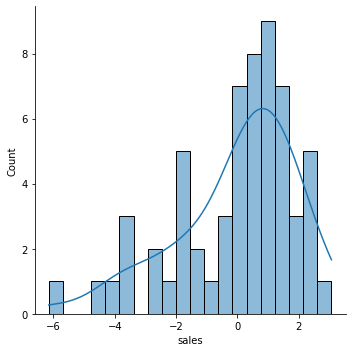

In [185]:
sns.displot(test_residual,bins=20, kde= True)

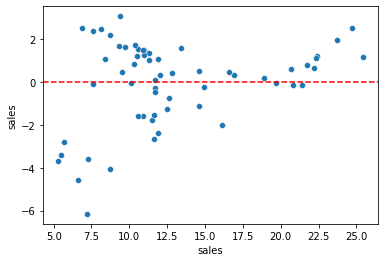

In [186]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')

In [187]:
# test_residual is not shows any pattern so Linear regression is correct choice for this data set

In [188]:
# Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [189]:
import scipy as sp

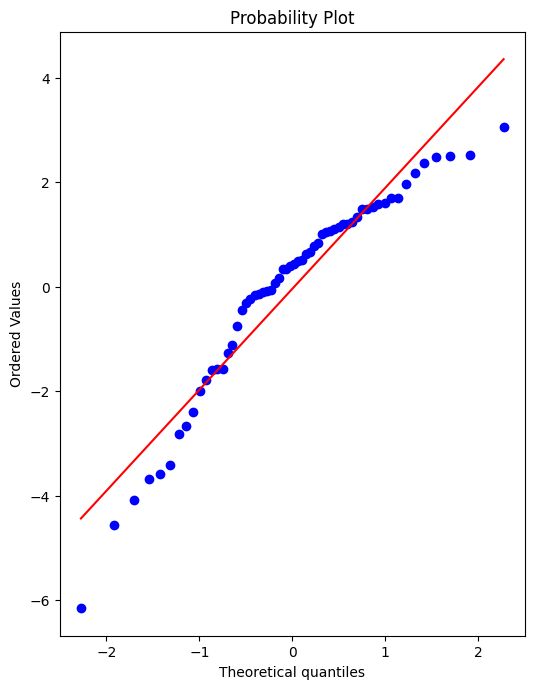

In [190]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residual,plot=ax)

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [191]:
final_model = LinearRegression()

In [192]:
final_model.fit(X,y)

LinearRegression()

In [193]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [194]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [195]:
from joblib import dump, load

In [196]:
# Saving the model
dump(final_model, 'final_sales.joblib')

['final_sales.joblib']

In [197]:
# loading model
loaded_model = load('final_sales.joblib')

In [198]:
# consider we spend = 149 on TV, 22 on Radio, 12 Newspaper. what is the sale?

campaign = [[149,22,12]]

In [199]:
loaded_model.predict(campaign)

array([13.893032])